<h1><center>Równanie Lotki-Volterry do opisu zależności w ekosystemie. Model drapieżnik-ofiara</center></h1>

# Spis treści:
### 1. [Wstęp](#1)
### 2. [Model - część teoretyczna](#2)
   * ##### [Historia modelu](#2_1)
   * ##### [Opis modelu](#2_2)
### 3. [Model w Pythonie - część praktyczna](#3)
   * ##### [Rozwiązanie numeryczne za pomocą metody Eulera](#3_1)
### 4. [Modyfikacje modelu podstawowego](#4)
### 5. [Analiza symulacji](#5)
### 6. [Wyniki i wnioski](#6)
### 7. [Zakończenie](#7)



# Wstęp <a id="1"></a>

#### ... bo czym byłaby udana podróż bez punktu startowego

##### Witamy w naszej podróży po *groźnie brzmiącym* świecie modelu drapieżnik-ofiara, czyli Lotki-Volterry. Postaramy się jednak, aby była ona raczej poszczerzeniem horyzontów, aniżeli drogą przez mękę. Zacznijmy od określenia punktu A wejścia i B wyjścia - motywacji i celów: 

### Motywacja:

* czlowiek jako istota pełna antagonizmów poprzez poznanie skrajności może dojść do fundamentalnych konkluzji, a przez kulturę przewija się od zawsze motyw walki dobra ze złem, dlatego uznaliśmy, że jest to temat warty zgłębienia,

* na 1 roku na projekcie z Pakietów matematycznych braliśmy pod lupę model rozwoju agresji w społeczeństwie z elementami teorii gier, dlatego uznaliśmy, że warto pociągnąć ten informatyczny temat w kontekście matematycznym,

* w globalnym kontekście uważamy, że jest to realny problem który można przestudiować, co może podnieść naszą świadomość w sprawie utrzymania niektórych ekosystemów.

### Cele:
* zapoznanie się z modelem Lotki-Volterry i implementacja w wraunkach programistycznych, 

* „udziwnienie” modelu (poprzez jego „unormalnienie”), czyli wprowadzenie dodatkowych zmiennych upodabniających model do świata realnego,

* przeprowadzenie symulacji oraz ich analiza,

* wyciągnięcie wniosków oraz porównanie wyników z wynikami symulacji rozwoju agresji z wyżej wspomniangeo projektu,

* zadanie dodatkowych pytań i próba odpowiedzi na nie (np. co byłoby kluczowe, aby taka symulacja odzwierciedlała w pełni rzeczywistość, co by nam dał eksperyment, tutaj jeszcze jedno krótkie pytanie itp.)

##### Mapę po naszym projekcie można znaleźć na samej górze. A skoro już wiemy skąd wychodzimy i dokąd zmierzamy, to jako że droga jest w każdej podróży najważniejsza, właśnie do niej przejdźmy.

# Model - część teoretyczna <a id="2"></a>

#### ...czyli o dwóch takich, co wpadli na to samo

### Historia modelu <a id="2_1"></a>

Zależności na linii drapieżnik-ofiara obserwuje się w przyrodzie od zawsze. Jest to konsekwencją przyjmowania różnych strategii na drodze do osiągnięcia zamierzonego celu. W interakcjach między orgzanizmami w ekosystemie tym celem jest najczęściej przeżycie. Takie zależności występowały między jednokomórkowcami, występowały między dinozaurami, występują do dnia dzisiejszego w świecie roślin i zwierząt. Tak głęboko zakorzeniony problem musiał być w końcu wzięty pod lupę. I został. Na początku XX wieku.

W 1910 roku amerykański matematyk Alfred James Lotka publikuje teorię o autokatalitycznych reakcjach chemicznych. Sam Lotka, pasjonat chemii fizycznej, chce przenieść swoją wiedzę na obszar biologii i rozwinąć dziedzinę biologii fizycznej, gdyż obiema sferami rządzą analogiczne podstawowe prawa. Jego praca zostaje zauważona w latach 20., a matematykowi zostają umożliwione dalsze badania. W tych z 1925 roku dochodzi do modelu, w którym interakcja w środowisku między drapieżnikiem a ofiarą przyjmuje postać nietłumionej, ciągłęj oscylacji dwóch skrajnych gatunków.

W tym samym roku włoski matematyk Vito Volterra, niezależnie od Alfreda Lotki, podejmuje się analizy problemu rybaków na Morzu Adriatyckim. Wyławianych jest więcej ryb drapieżnych w okresie po 1. wojnie światowej, choć pozornie wszystkie populacje ryb powinny ucierpieć w wyniku konfliktu. Jak wyjasniał później Volterra, było to spowodowane zaprzestaniem połowu w tym okresie, a w takim wypadku populacja drapieżników wróciła do „normy". W 1926 roku opublikował pracę opierającą się na modelu populacyjnym, z podobną oscylacją opisaną przez Lotkę. 

Równania opisujące interakcje drapieżnik-ofiara zostały w późniejszym czasie nazwane **Modelem Lotki-Volterrego**, który stanowi podstawę dalszych badań w zakresie ekologii matematycznych populacji (*mathematical population ecology*) i jest kamieniem milowym w tej dziedzinie.

### Opis modelu <a id="2_2"></a>

# Model w Pythonie - część praktyczna <a id="3"></a>

### Rozwiązanie numeryczne za pomocą metody Eulera <a id="3_1"></a>

Aby rozwiązać nasze równanie numerycznie, zmieńmy nieco sposób, w jaki na nie patrzymy. 

\begin{align}
    \frac{\mathbb{d}x}{\mathbb{d}t}&=a \,x-b \,xy &&&&& \frac{\Delta x}{\Delta t}&=a \,x-b \,xy \\[2 em]
     \frac{\mathbb{d}y}{\mathbb{d}t} &=d \,xy-c\,y &&&&& \frac{\Delta y}{\Delta t}&=d \,xy-c\,y
\end{align}

Stosując taki zapis chcemy podkreślić, że aby rozwiązać układ numerycznie, będziemy wielokrotnie wyliczać jego wartości dla dyskretnych czasów.

Następnie wymnażamy obie strony równania przez $\Delta{t}$,

\begin{equation*}
    \begin{split}
        \Delta x&=(a \,x-b \,xy) \Delta t \\[4pt]
        \Delta y&=(d \,xy-c\,y) \Delta t 
    \end{split}
\end{equation*}

co pozwoli nam przystąpić do implementacji funkcji w Pythonie.

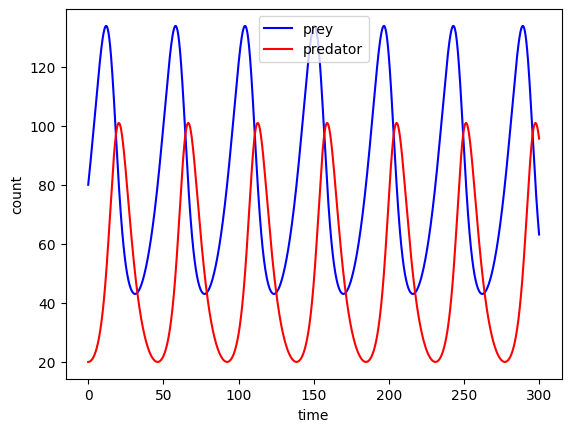

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_simple_euler(x_0, y_0, a, b, d, c, t_end, delta_t):
    x = [x_0]
    y = [y_0]
    t = np.arange(0, t_end+delta_t, delta_t)

    for _ in range(len(t)-1):
        next_x = x[-1] + (a*x[-1] - b*x[-1]*y[-1])*delta_t #aktualne x + delta x
        x.append(next_x)

        next_y = y[-1] + (d*x[-1]*y[-1] - c*y[-1])*delta_t #aktualne y + delta y
        y.append(next_y)

    #rysowanie wykresu
    f, ax = plt.subplots(1)

    fig1 = ax.plot(t, x, color="b", label="prey")
    fig2 = ax.plot(t, y, color="r", label="predator")

    ax.set_ylabel("count")
    ax.set_xlabel("time")
    ax.legend(labels=["prey", "predator"])
    plt.show()

predator_prey_simple_euler(80, 20, 0.1, 0.002, 0.0025, 0.2, 300, 0.01)
        


### Rozwiązanie numeryczne za pomocą metody Rungego-Kutty (4-tego stopnia)

[50.         50.02004774 50.04019091 ... 50.53346928 50.55589919
 50.57842295]


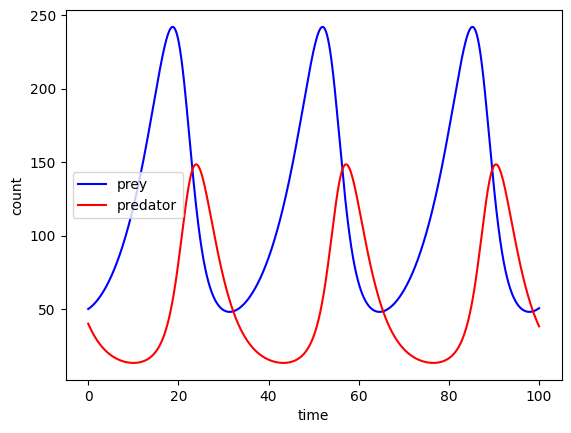

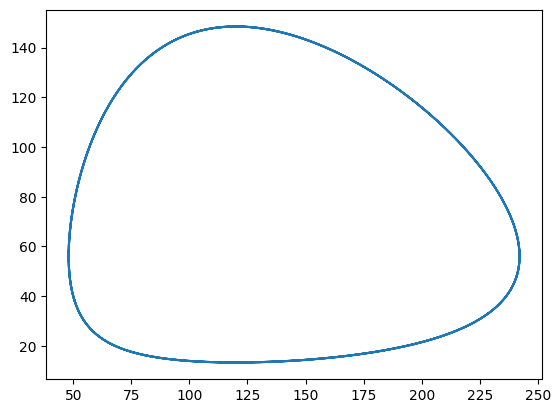

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun(t, y, a, b, d, c):
    dxdt = a*y[0] - b*y[0]*y[1]
    dydt = d*y[0]*y[1] - c*y[1]
    return np.array([dxdt, dydt])

def runge_kutta(t, y, h, a ,b, d, c):
    k1 = lotka_volterra_fun(t, y, a, b, d, c)
    k2 = lotka_volterra_fun(t+h/2, y+k1*h/2, a, b, d, c)
    k3 = lotka_volterra_fun(t+h/2, y+k2*h/2, a, b, d, c)
    k4 = lotka_volterra_fun(t+h, y+k3*h, a, b, d, c)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta(initial_cons, t_end, a, b, d, c, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta(t[i-1], y[i-1], h, a, b, d, c)

    return t, y


a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([50, 40]), 100, a, b, d, c, h)

print(y[:, 0])

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.show()



# Modyfikacje modelu podstawowego <a id="4"></a>

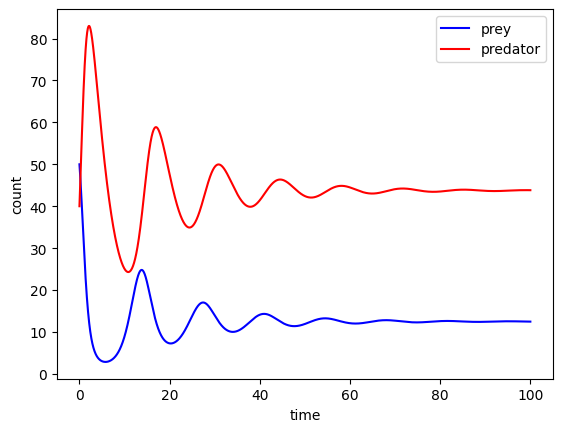

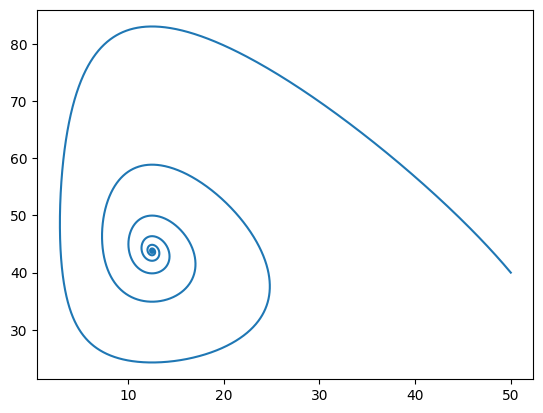

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun(t, y, a, b, d, c, e):
    dxdt = y[0]*(a - e*y[0] - b*y[1])
    dydt = -y[1]*(c - d*y[0])
    return np.array([dxdt, dydt])

def runge_kutta(t, y, h, a ,b, d, c, e):
    k1 = lotka_volterra_fun(t, y, a, b, d, c, e)
    k2 = lotka_volterra_fun(t+h/2, y+k1*h/2, a, b, d, c, e)
    k3 = lotka_volterra_fun(t+h/2, y+k2*h/2, a, b, d, c, e)
    k4 = lotka_volterra_fun(t+h, y+k3*h, a, b, d, c, e)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta(initial_cons, t_end, a, b, d, c, e, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta(t[i-1], y[i-1], h, a, b, d, c, e)

    return t, y

a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([50, 40]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.show()



# Analiza symulacji <a id="5"></a>

# Wyniki i wnioski <a id="6"></a>

# Zakończenie <a id="7"></a>